In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [2]:
noreuse = pd.read_csv('outputs/noreuse-stdlib-compile-profile.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('outputs/reuse-stdlib-compile-profile.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147292160
1,Init/Prelude.lean,reuse_across_ctor_disabled,c_file_size,353579
2,Init/Prelude.lean,reuse_across_ctor_disabled,time_elapsed_ms,2936
3,Lean/Runtime.lean,reuse_across_ctor_disabled,rss,69337088
4,Lean/Runtime.lean,reuse_across_ctor_disabled,c_file_size,2787
...,...,...,...,...
2545,Lake/CLI.lean,reuse_across_ctor_disabled,c_file_size,1143
2546,Lake/CLI.lean,reuse_across_ctor_disabled,time_elapsed_ms,361
2547,Lake/Main.lean,reuse_across_ctor_disabled,rss,306888704
2548,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144535552
1,Init/Prelude.lean,reuse_across_ctor_disabled,c_file_size,353579
2,Init/Prelude.lean,reuse_across_ctor_disabled,time_elapsed_ms,2448
3,Init/Coe.lean,reuse_across_ctor_disabled,rss,73531392
4,Init/Coe.lean,reuse_across_ctor_disabled,c_file_size,25689
...,...,...,...,...
2545,Lake/CLI.lean,reuse_across_ctor_disabled,c_file_size,1143
2546,Lake/CLI.lean,reuse_across_ctor_disabled,time_elapsed_ms,378
2547,Lake/Main.lean,reuse_across_ctor_disabled,rss,304136192
2548,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


In [3]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [4]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144535552,reuse_across_ctor_disabled,147292160
1,Init/Prelude.lean,reuse_across_ctor_disabled,c_file_size,353579,reuse_across_ctor_disabled,353579
2,Init/Prelude.lean,reuse_across_ctor_disabled,time_elapsed_ms,2448,reuse_across_ctor_disabled,2936
3,Init/Coe.lean,reuse_across_ctor_disabled,rss,73531392,reuse_across_ctor_disabled,75235328
4,Init/Coe.lean,reuse_across_ctor_disabled,c_file_size,25689,reuse_across_ctor_disabled,25689
...,...,...,...,...,...,...
2545,Lake/CLI.lean,reuse_across_ctor_disabled,c_file_size,1143,reuse_across_ctor_disabled,1143
2546,Lake/CLI.lean,reuse_across_ctor_disabled,time_elapsed_ms,378,reuse_across_ctor_disabled,361
2547,Lake/Main.lean,reuse_across_ctor_disabled,rss,304136192,reuse_across_ctor_disabled,306888704
2548,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/Eqns.lean,864,1311,447,34.096110
1,Lean/Compiler/IR.lean,552,833,281,33.733493
2,Lean/Compiler/LCNF/DependsOn.lean,335,499,164,32.865731
3,Lean/Meta/Tactic/Unfold.lean,482,702,220,31.339031
4,Init/Data/Nat/Lcm.lean,245,346,101,29.190751
...,...,...,...,...,...
845,Lean/Linter/Builtin.lean,1014,674,-340,-50.445104
846,Lean/Data/Json/Parser.lean,1098,713,-385,-53.997195
847,Lean/Runtime.lean,305,151,-154,-101.986755
848,Lean/Util/PtrSet.lean,607,221,-386,-174.660633


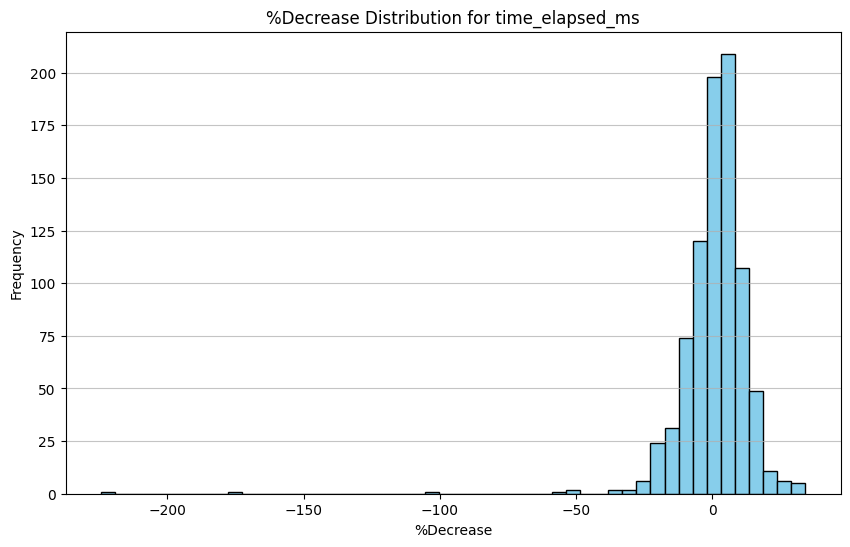

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Data/AssocList.lean,92278784,96473088,4194304,4.347641
1,Init/Data/Option/Instances.lean,87175168,90976256,3801088,4.178110
2,Init/Data/Char/Basic.lean,86515712,90185728,3670016,4.069398
3,Lean/Meta/TransparencyMode.lean,84148224,87687168,3538944,4.035874
4,Init/Data/Sum.lean,81350656,84758528,3407872,4.020683
...,...,...,...,...,...
845,Lean/Elab/PreDefinition/WF.lean,331800576,332845056,1044480,0.313804
846,Lean.lean,498442240,499884032,1441792,0.288425
847,Init/Control.lean,102809600,103071744,262144,0.254332
848,Lean/Meta/Tactic/LinearArith/Nat.lean,181637120,182030336,393216,0.216017


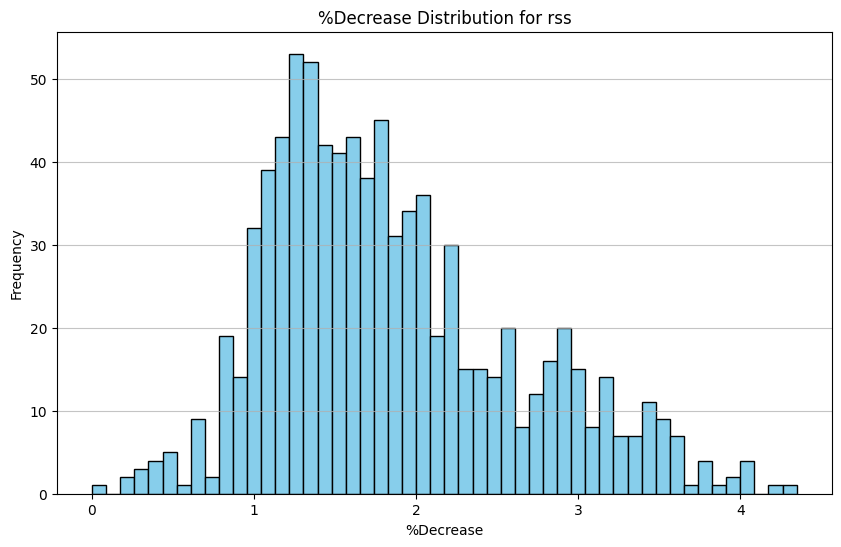

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,NaN,NaN,NaN,447,34.096110
1,NaN,NaN,NaN,281,33.733493
2,NaN,NaN,NaN,164,32.865731
3,NaN,NaN,NaN,220,31.339031
4,NaN,NaN,NaN,101,29.190751
...,...,...,...,...,...
2545,NaN,NaN,NaN,-340,-50.445104
2546,NaN,NaN,NaN,-385,-53.997195
2547,NaN,NaN,NaN,-154,-101.986755
2548,NaN,NaN,NaN,-386,-174.660633


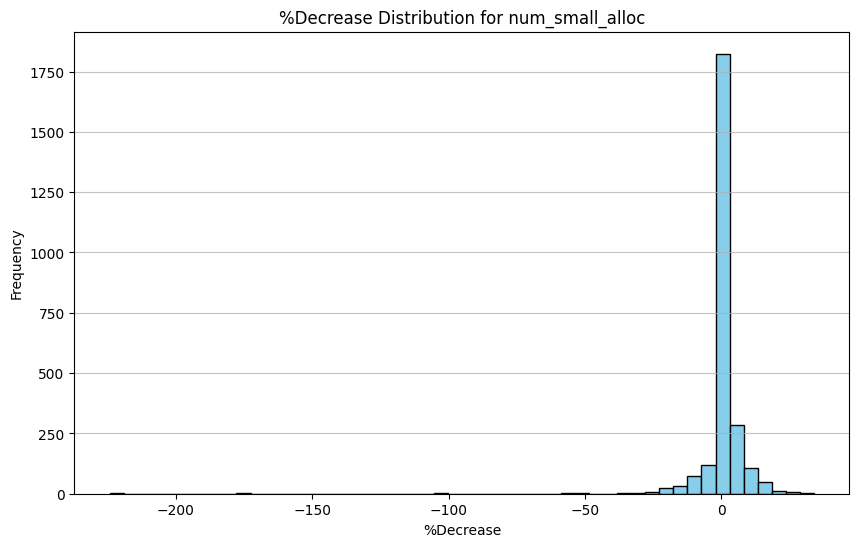

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,NaN,NaN,NaN,447,34.096110
1,NaN,NaN,NaN,281,33.733493
2,NaN,NaN,NaN,164,32.865731
3,NaN,NaN,NaN,220,31.339031
4,NaN,NaN,NaN,101,29.190751
...,...,...,...,...,...
2545,NaN,NaN,NaN,-340,-50.445104
2546,NaN,NaN,NaN,-385,-53.997195
2547,NaN,NaN,NaN,-154,-101.986755
2548,NaN,NaN,NaN,-386,-174.660633


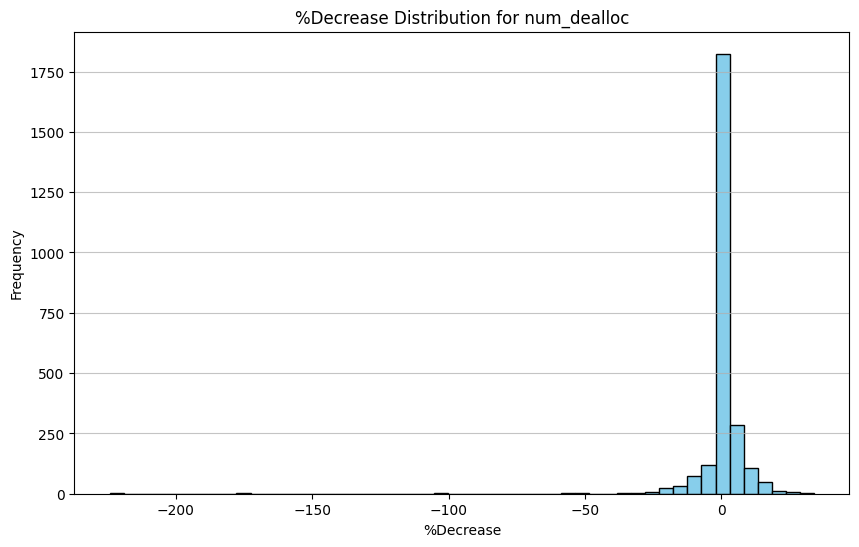

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,NaN,NaN,NaN,447,34.096110
1,NaN,NaN,NaN,281,33.733493
2,NaN,NaN,NaN,164,32.865731
3,NaN,NaN,NaN,220,31.339031
4,NaN,NaN,NaN,101,29.190751
...,...,...,...,...,...
2545,NaN,NaN,NaN,-340,-50.445104
2546,NaN,NaN,NaN,-385,-53.997195
2547,NaN,NaN,NaN,-154,-101.986755
2548,NaN,NaN,NaN,-386,-174.660633


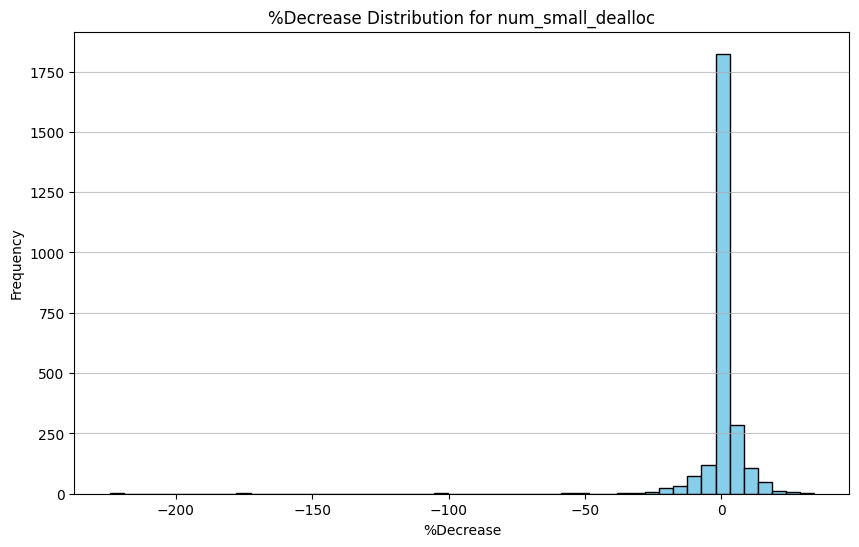

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,353579,353579,0,0.0
1,Lean/Meta/Tactic/Acyclic.lean,63287,63287,0,0.0
2,Lean/Meta/Tactic/Simp/SimpAll.lean,180249,180249,0,0.0
3,Lean/Elab/PatternVar.lean,405303,405303,0,0.0
4,Lean/Meta/Tactic/Simp/BuiltinSimprocs/String.lean,52785,52785,0,0.0
...,...,...,...,...,...
845,Lean/DeclarationRange.lean,83728,83728,0,0.0
846,Lean/Parser/StrInterpolation.lean,16919,16919,0,0.0
847,Lean/CoreM.lean,494608,494608,0,0.0
848,Lean/Data/Lsp/Utf16.lean,18541,18541,0,0.0


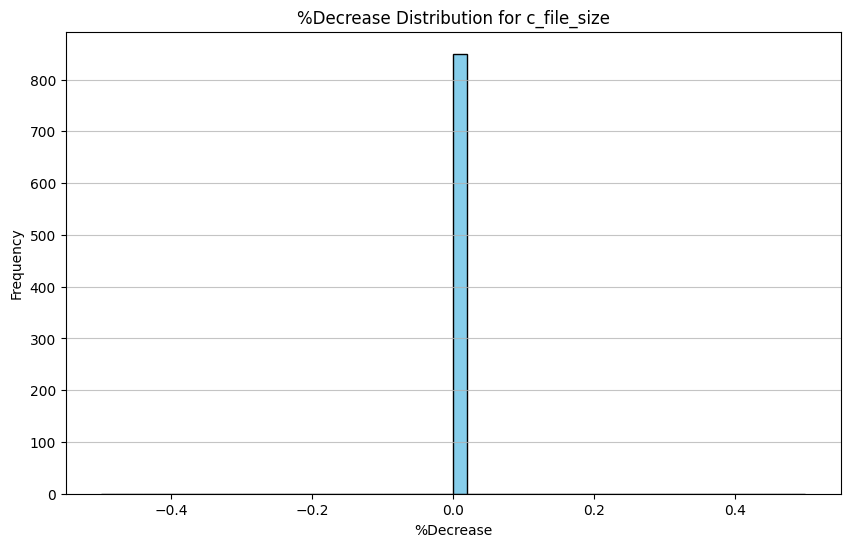

In [5]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,17531,NaN
Lean/Elab/Do.lean,14239,NaN
Lean/PrettyPrinter/Delaborator/Builtins.lean,11701,NaN
Lean/Compiler/IR/EmitLLVM.lean,11076,NaN
Lean/Elab/Match.lean,9922,NaN
...,...,...
Init/Data/ToString.lean,126,NaN
Init/Data/String.lean,125,NaN
Init/Data/Char.lean,123,NaN


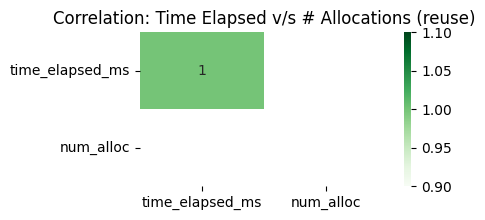

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16710,NaN
Lean/Elab/Do.lean,14801,NaN
Lean/Compiler/IR/EmitLLVM.lean,12814,NaN
Lean/PrettyPrinter/Delaborator/Builtins.lean,12008,NaN
Lean/Elab/App.lean,10014,NaN
...,...,...
Init/Control/Id.lean,124,NaN
Init/Data/FloatArray.lean,123,NaN
Init/Data/Char.lean,121,NaN


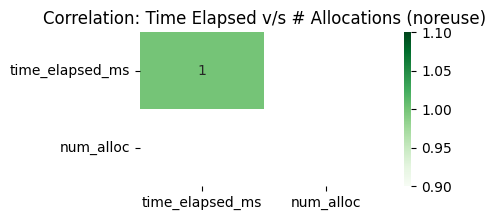

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,17531,NaN
Lean/Elab/Tactic/Omega/Frontend.lean,16710,NaN
Lean/Elab/Do.lean,14801,NaN
Lean/Elab/Do.lean,14239,NaN
Lean/Compiler/IR/EmitLLVM.lean,12814,NaN
...,...,...
Init/Control/Id.lean,121,NaN
Init/Data/Char.lean,121,NaN
Init/Data/String.lean,119,NaN


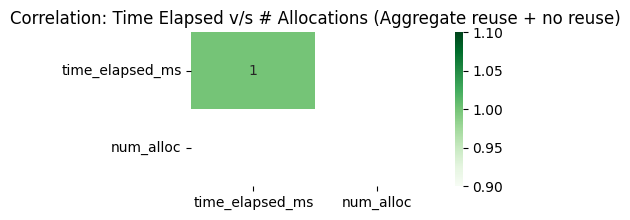

In [6]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: